In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
file_path = 'Z:\RLust\Data\BSA-dataset_2122_2223-Train_stud_a.xlsx' 

# Load the Excel file into a pandas DataFrame
df = pd.read_excel(file_path , sheet_name=0) 

<>:2: SyntaxWarning: invalid escape sequence '\R'
<>:2: SyntaxWarning: invalid escape sequence '\R'
C:\Users\rlust\AppData\Local\Temp\ipykernel_8972\3425854679.py:2: SyntaxWarning: invalid escape sequence '\R'
  file_path = 'Z:\RLust\Data\BSA-dataset_2122_2223-Train_stud_a.xlsx'


In [77]:
# Create passedC3 column and initialize with zeros
df['passedC3B1'] = ((df['Course3-1'] >= 5.5) & (~df['Course3-1'].isna())).astype(int)

# Create passedC9 column and initialize with zeros
df['passedC9B1'] = ((df['Course9-1'] >= 5.5) & (~df['Course9-1'].isna())).astype(int)

# Create resits_needed column and initialize with zeros
df['resits_neededB1'] = 0

# Increment resits_needed by 1 if Course3_1 is less than 5.5 or missing
df.loc[(df['Course3-1'] < 5.5) | (df['Course3-1'].isna()), 'resits_neededB1'] += 1

# Increment resits_needed by 1 if Course9_1 is less than 5.5 or missing
df.loc[(df['Course9-1'] < 5.5) | (df['Course9-1'].isna()), 'resits_neededB1'] += 1

#absent
df['absentB1'] = 0
# Increment absent by 1 if Course3_1 is missing
df.loc[df['Course3-1'].isna(), 'absentB1'] += 1

# Increment absent by 1 if Course9_1 is missing
df.loc[df['Course9-1'].isna(), 'absentB1'] += 1


# Calculate average_gradeB1B2 as the row mean of specified columns
df['average_gradeB1'] = df[['Course3-1', 'Course9-1']].mean(axis=1)
df['average_gradeB1'] = round(df['average_gradeB1'], 2)

# Calculate mean for each course
mean_course3 = df['Course3-1'].mean()
mean_course9 = df['Course9-1'].mean()

# Calculate mean_program1B1B2 as the row mean of mean_course values
mean_program1B1 = (mean_course3 + mean_course9) / 2
mean_program1B1 = round(mean_program1B1, 2)

# Update mean_course values with rounded values
df['mean_course3'] = round(mean_course3, 2)
df['mean_course9'] = round(mean_course9, 2)

# Update mean_program1B1B2 with rounded value
df['mean_program1B1'] = round(mean_program1B1, 2)

# Calculate deviationB1B2 as the difference between average_gradeB1B2 and mean_program1B1B2
df['deviationB1'] = df['average_gradeB1'] - df['mean_program1B1']
df['deviationB1'] = round(df['deviationB1'], 2)

# Create 'Dutch' column with True/False values based on the condition
df['Dutch'] = (df['Nationality'] == 'Nederland')


df['Dutch'] = df['Dutch'].astype(int)

# Create 'Dutch' column with True/False values based on the condition
df['Non-Dutch'] = (df['Nationality'] != 'Nederland')


df['Non-Dutch'] = df['Non-Dutch'].astype(int)

In [78]:
# Initialize the YEAR column with zeros
df['YEAR'] = 0

# Loop through each column specified in the varlist
for var in ['Course23', 'Course26', 'Course3', 'Course16', 'Course8', 'Course9', 'Course22', 'Course7', 'Course25', 'Course24']:
    df['YEAR'] += df[var].apply(lambda x: 6 if x >= 5.5 and not pd.isnull(x) else 0)

# Generate the passed42 column and convert boolean to integer
df['passed42'] = (df['YEAR'] >= 42).astype(int)


df = pd.get_dummies(df, columns=['Gender', 'PreEducation'], dtype=int)


non_categorical_columns = [col for col in df.columns if col not in ['Gender', 'Nationality', 'PreEducation', 'Program', 'Year', 'BSA']]
df[non_categorical_columns] = df[non_categorical_columns].fillna(0)

In [79]:
df['CreditsB1'] = 0

# Loop through each column specified in the varlist
for var in ['Course3-1', 'Course9-1']:
    df['CreditsB1'] += df[var].apply(lambda x: 6 if x >= 5.5 and not pd.isnull(x) else 0)

In [80]:
columns_to_drop = ['train', 'Course23', 'Course26', 'Course16', 'Course8', 'Course22', 'Course7', 'Course25', 'Course24', 'Credits-Y1', 'BSA','Program', 'YEAR','Year', 'Course3', 'Course9','mean_course3' ,'mean_course9',
 'mean_program1B1', 'Nationality','Course23-R', 'Course26-R', 'Course16-R', 'Course8-R', 'Course22-R', 'Course7-R', 'Course25-R', 'Course24-R', 'Course3-R', 'Course9-R', 'Course8-1', 'Course7-1', 'Crd-B1B2']



# Drop the specified columns
df.drop(columns=columns_to_drop, inplace=True)

In [81]:

X = df.drop(columns=['passed42'])
y = df['passed42']


In [82]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [83]:
# Create a baseline Random Forest Classifier
baseline_rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the baseline model
baseline_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred_baseline = baseline_rf_classifier.predict(X_test)

# Evaluate the baseline model
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
precision_baseline = precision_score(y_test, y_pred_baseline, average='binary')
recall_baseline = recall_score(y_test, y_pred_baseline, average='binary')
f1_baseline = f1_score(y_test, y_pred_baseline, average='binary')

# Print the baseline metrics
print('Baseline Model Performance:')
print(f'Accuracy: {accuracy_baseline}')
print(f'Precision: {precision_baseline}')
print(f'Recall: {recall_baseline}')
print(f'F1 Score: {f1_baseline}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_baseline))
print('Classification Report:')
print(classification_report(y_test, y_pred_baseline))

Baseline Model Performance:
Accuracy: 0.7762376237623763
Precision: 0.8007380073800738
Recall: 0.7862318840579711
F1 Score: 0.793418647166362
Confusion Matrix:
[[175  54]
 [ 59 217]]
Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.76      0.76       229
           1       0.80      0.79      0.79       276

    accuracy                           0.78       505
   macro avg       0.77      0.78      0.77       505
weighted avg       0.78      0.78      0.78       505



In [84]:
#stop here = give error 

In [85]:
# Define the parameter grid for Grid Search
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best parameters found by Grid Search
print(f'Best parameters found: {grid_search.best_params_}')


Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
295 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "C:\Users\rlust\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py", line 666, in _validate_params
    vali

Best parameters found: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


In [86]:
# Create the model with the best parameters found by Grid Search
best_rf_classifier = RandomForestClassifier(
    max_depth=grid_search.best_params_['max_depth'],
    max_features=grid_search.best_params_['max_features'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

# Train the model with the best parameters
best_rf_classifier.fit(X_train, y_train)

# Make predictions on the test set with the best model
y_pred_best = best_rf_classifier.predict(X_test)

# Evaluate the model with the best parameters
accuracy_best = accuracy_score(y_test, y_pred_best)
precision_best = precision_score(y_test, y_pred_best, average='binary')
recall_best = recall_score(y_test, y_pred_best, average='binary')
f1_best = f1_score(y_test, y_pred_best, average='binary')

# Print the metrics for the best model
print('Best Model Performance:')
print(f'Accuracy: {accuracy_best}')
print(f'Precision: {precision_best}')
print(f'Recall: {recall_best}')
print(f'F1 Score: {f1_best}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred_best))
print('Classification Report:')
print(classification_report(y_test, y_pred_best))

Best Model Performance:
Accuracy: 0.7900990099009901
Precision: 0.8079710144927537
Recall: 0.8079710144927537
F1 Score: 0.8079710144927537
Confusion Matrix:
[[176  53]
 [ 53 223]]
Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.77      0.77       229
           1       0.81      0.81      0.81       276

    accuracy                           0.79       505
   macro avg       0.79      0.79      0.79       505
weighted avg       0.79      0.79      0.79       505



In [87]:
#overfitting? 

#y_train_pred = best_rf_classifier.predict(X_train)

#acc = accuracy_score(y_train, y_train_pred)
#prec= precision_score(y_train, y_train_pred, average='binary')
#rec = recall_score(y_train, y_train_pred, average='binary')
#f1 = f1_score(y_train, y_train_pred, average='binary')

# Print the metrics for the best model

#print(f'Accuracy: {acc}')
#print(f'Precision: {prec}')
#print(f'Recall: {rec}')
#print(f'F1 Score: {f1}')


In [88]:
# Print the predictions made by the best model
print("Best Model Predictions:")
print(y_pred_best)


Best Model Predictions:
[1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0
 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 1 1 0 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0
 1 0 0 1 0 1 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0
 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 1 1 0 1 0 0 1 1 1 0
 0 1 0 0 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 0 0 1 0 1 0 0 1
 1 1 0 0 1 0 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 0 0 1 1 0 0 0 0 1 0 1 1 1 1 1 1 0 1 1
 1 1 1 1 1 0 0 1 1 1 1 1 0 1 1 1 1 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 0 0 0 0 0 1 1 1 1 0 1 0 1 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 1 1
 0 1 1 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 0 1 0 1 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 1 1 0 0 1 1 0 1 1
 

In [89]:
# Get the feature importances of the best model
feature_importances_best = best_rf_classifier.feature_importances_


feature_names = X.columns

# Create a DataFrame for better visualization
importance_df_best = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances_best
})

# Sort the DataFrame by importance
importance_df_best = importance_df_best.sort_values(by='Importance', ascending=False)

# Display the DataFrame
print('Feature Importances of the Best Model:')
print(importance_df_best)


Feature Importances of the Best Model:
                     Feature    Importance
1                  Course9-1  2.031356e-01
6            average_gradeB1  1.802315e-01
4            resits_neededB1  1.118828e-01
7                deviationB1  1.071203e-01
18                 CreditsB1  9.001535e-02
3                 passedC9B1  8.899855e-02
0                  Course3-1  8.290708e-02
5                   absentB1  4.508621e-02
2                 passedC3B1  2.779282e-02
10                  Gender_F  1.125423e-02
11                  Gender_M  1.042867e-02
8                      Dutch  8.854815e-03
9                  Non-Dutch  8.689968e-03
12  PreEducation_Buitenlands  8.472747e-03
15          PreEducation_Vwo  7.601551e-03
13          PreEducation_Hbo  5.746151e-03
16           PreEducation_Wo  9.778050e-04
14       PreEducation_Overig  8.033047e-04
17          PreEducation_nvt  5.345463e-07


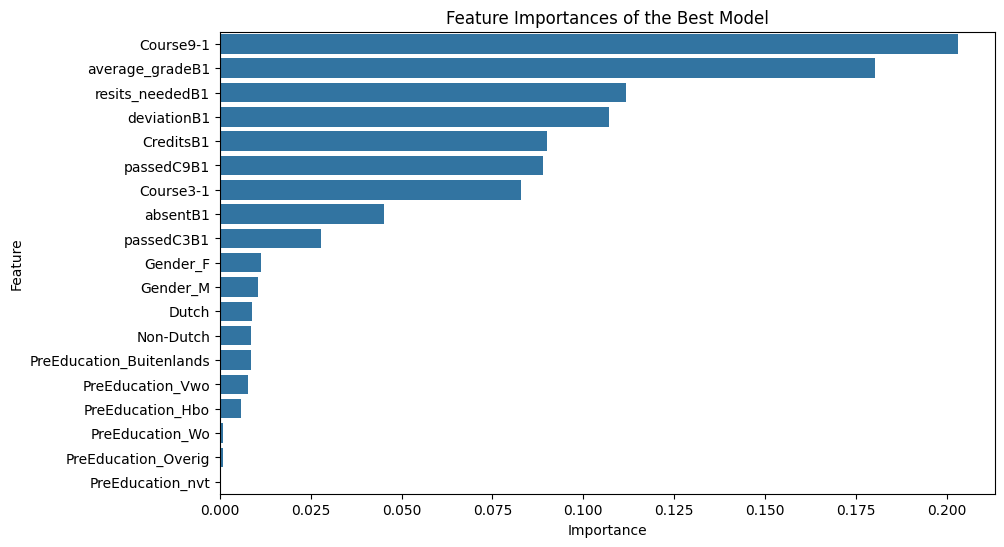

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df_best)
plt.title('Feature Importances of the Best Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [91]:
correlation_matrix = X_train.corr()

print(correlation_matrix)

                          Course3-1  Course9-1  passedC3B1  passedC9B1  \
Course3-1                  1.000000   0.542479    0.800562    0.430574   
Course9-1                  0.542479   1.000000    0.455798    0.883380   
passedC3B1                 0.800562   0.455798    1.000000    0.386505   
passedC9B1                 0.430574   0.883380    0.386505    1.000000   
resits_neededB1           -0.735401  -0.808612   -0.826151   -0.838973   
absentB1                  -0.724132  -0.673804   -0.462876   -0.472188   
average_gradeB1            0.844903   0.787070    0.691510    0.709756   
deviationB1                0.569457   0.696468    0.597699    0.695978   
Dutch                     -0.214322  -0.297033   -0.114928   -0.257930   
Non-Dutch                  0.214322   0.297033    0.114928    0.257930   
Gender_F                   0.033768   0.124982   -0.001118    0.119941   
Gender_M                  -0.033768  -0.124982    0.001118   -0.119941   
PreEducation_Buitenlands   0.169560   

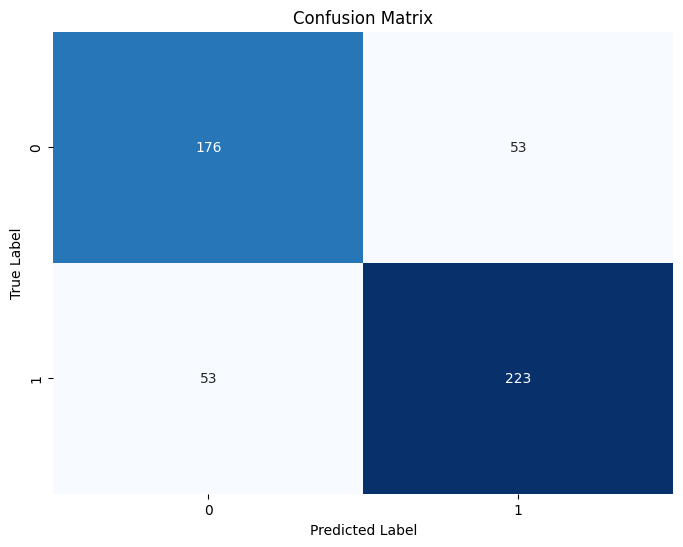

In [92]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_best)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
